# ***Exploratory Data Analisys - Análisis sobre los hábitos de vida del ciudadano***
## ➡️ **Visualizaciones y relaciones Eentre variables**
------

### 🗒️**Bloque de contenidos:**

1. [Importación de módulos](#1-importación-de-módulos)
2. [Carga del dataset limpio](#2-carga-del-dataset-limpio)

### **1. Importación de módulos**

In [1]:
# Ajusto la ruta
%cd ..

c:\Users\sorim\Documents\Data_Science\Evolve\repos\projects-evolve\EDA


In [2]:
from scripts.individual_visualization import distribucion_sueño
from scripts.relationship_visualization import boxplot_cat_num, plot_cartegoricas, violin_cat_num
from scripts.variables import orden_categorias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


### **2. Carga del dataset limpio**

In [3]:
df = pd.read_csv('./data/data_clean.csv', low_memory = False) # Me salía un warning y me recomendó poner este argumento a False.
df.head()

,ejercicio,asma,cancer,grupo_edad,ingresos,educacion,empleo,estado,IMC,sueño_h,fumar,alcohol,salud_mental_malos,salud_general,salud_fisica_mala,diabetes,enf_cardio,sueño_cat
0,No,No,No,Age 80 or older,Refused,Graduated from College or Technical School,Retired,Alabama,NULO,8.0,No,No drinks in past 30 days,NaN,Very good,NaN,Yes,No,Más de 7h
1,No,No,Yes,Age 80 or older,"$25,000 to < $35,000",Graduated High School,Self-employed,Alabama,Overweight,6.0,No,No drinks in past 30 days,NaN,Excellent,NaN,No,No,Entre 4 y 7h
2,Yes,No,No,Age 55 to 59,"$150,000 to < $200,000",Graduated from College or Technical School,Retired,Alabama,Overweight,5.0,No,No drinks in past 30 days,3.0,Very good,2.0,No,No,Entre 4 y 7h
3,Yes,Yes,No,NULO,Don’t know/Not sure,Graduated High School,Retired,Alabama,Normal Weight,7.0,Yes,No drinks in past 30 days,NaN,Excellent,NaN,No,No,Entre 4 y 7h
4,Yes,No,No,Age 40 to 44,"$25,000 to < $35,000",Attended College or Technical School,A homemaker,Alabama,Normal Weight,9.0,No,2 days per week,NaN,Fair,2.0,No,No,Más de 7h


### **3. Distribución final de las variables**

Una vez hecha todas las transformaciones pertinentes, visualizamos únicamente aquella que hemos transformado y no hemos visto su distribución siendo de tipo categórica.

In [4]:
num_cols = ['salud_mental_malos', 'salud_fisica_mala']
cat_cols = [col for col in df.columns if col not in num_cols and col != 'sueño_h']

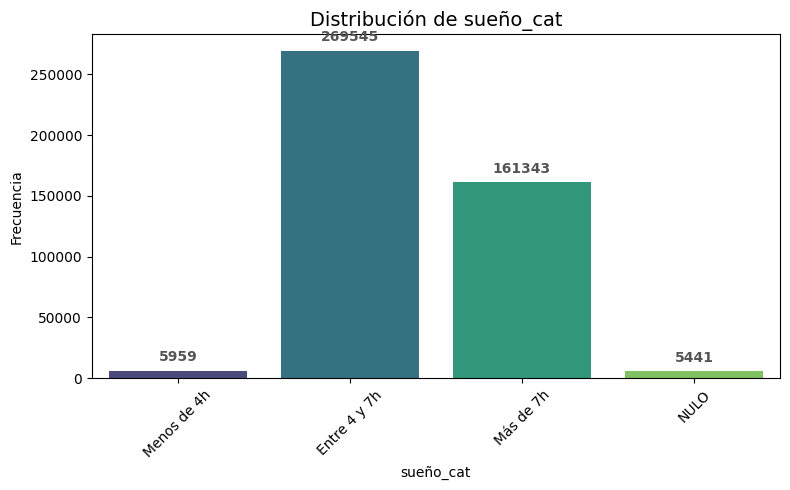

In [5]:
distribucion_sueño(df, 'sueño_cat')


Al categorizar esta variable, el ruido que puede generar los outliers es menor.

Se puede observar que los valores se concentran en la etiquea de entre 4 y 7h y en el de más de 7h

### **4. Relaciones clave entre variables** 

En este apartado se analizarán las **relaciones más relevantes** entre las variables del dataset, siempre desde un enfoque exploratorio. Aunque este análisis no pretende establecer causalidad, sí permite identificar patrones, tendencias y posibles asociaciones que pueden ser útiles para futuros modelos o hipótesis.

El **objetivo** es responder a preguntas como:

- ¿Cómo se relacionan los hábitos con la salud percibida?

- ¿Existen combinaciones de factores que parezcan afectar al bienestar general?

- ¿Qué variables muestran patrones consistentes entre sí?

- ¿Hay diferencias entre grupos específicos?

A continuación se describen las principales relaciones que se explorarán:


#### ***4.1. Relación entre actividad física y salud mental***

La actividad física es uno de los factores más estudiados dentro del bienestar psicológico.

**Aspectos que se investigarán**:

- ¿Reportan mejor salud mental las personas que realizan actividad física de manera regular?

- ¿Qué ocurre con las personas que declaran no realizar ejercicio?

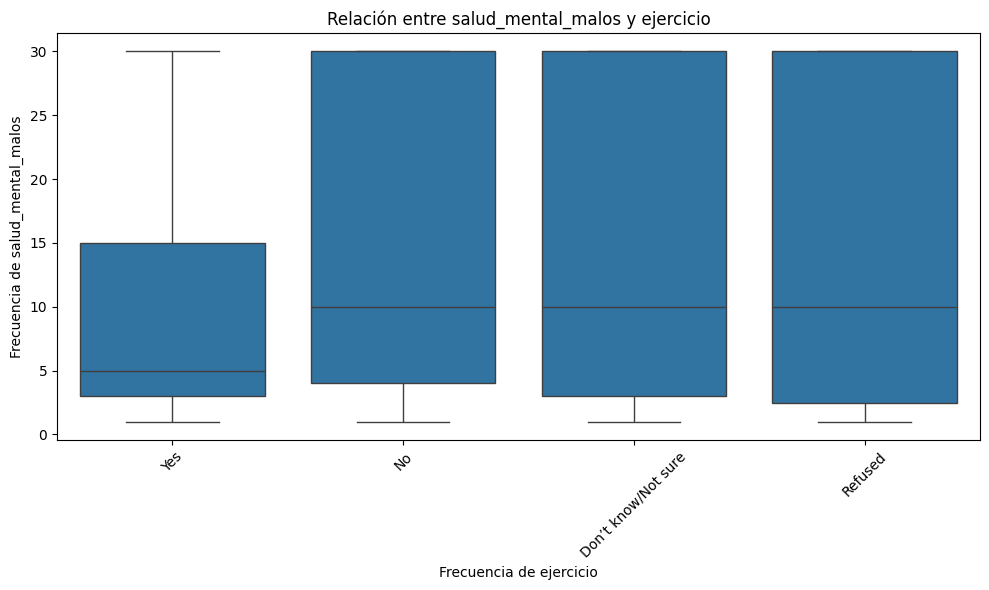

In [6]:
boxplot_cat_num(df, 'ejercicio', 'salud_mental_malos', orden_categorias)

*Conclusiones*:
- Existe una clara diferencia en la distribución de días de mala salud mental según la actividad física. El grupo que realiza ejercicio (`Yes`) muestra una mediana significativamente menor (~5 días) comparado con el grupo sedentario (~10 días). Además, la dispersión en el grupo que no realiza ejercicio es alarmante: el tercer cuartil alcanza el máximo posible (30 días), indicando que una porción muy significativa de las personas que no hacen ejercicio reportan malestar mental durante todo el mes, algo que es mucho menos frecuente en el grupo activo.

- Además, podemos concluir que las personas que tanto han rechazado responder a la prehgunta y los que contestaron `Don't know/Not sure`, existe una alta relación de que tampoco realizasen ejercicio dada la relación que tiene con este valor.

#### ***4.2. Sueño y salud general***

El sueño es un determinante esencial del bienestar físico y emocional.

**Preguntas exploratorias**:

- ¿Las personas que duermen menos de 6 horas reportan peor salud general?

- ¿Existe un rango óptimo (7–8 horas) asociado a mejores indicadores?

- ¿Cómo se comporta la distribución de enfermedades crónicas frente a niveles bajos de sueño?

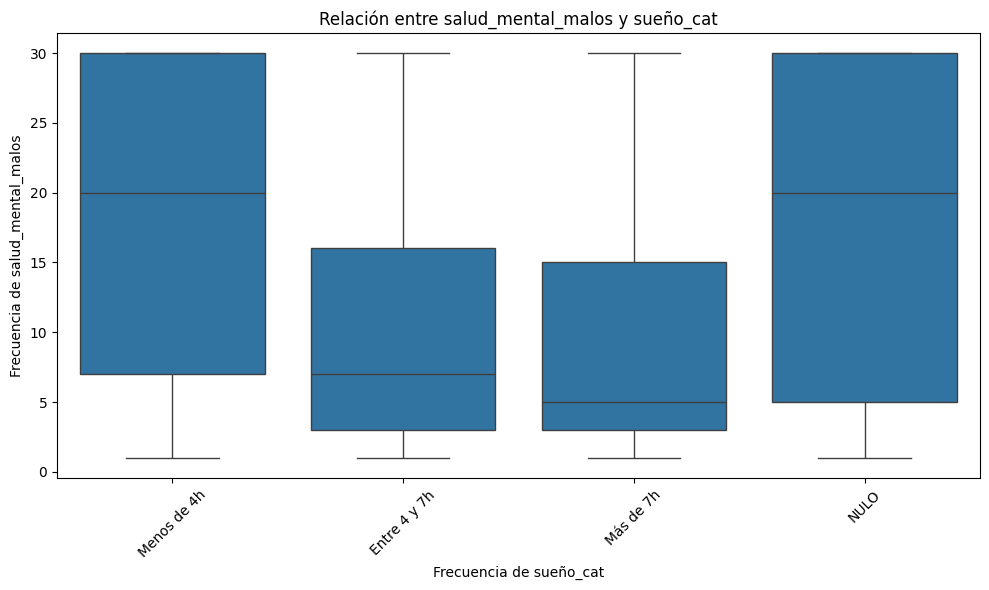

In [7]:
boxplot_cat_num(df, 'sueño_cat', 'salud_mental_malos', orden_categorias)

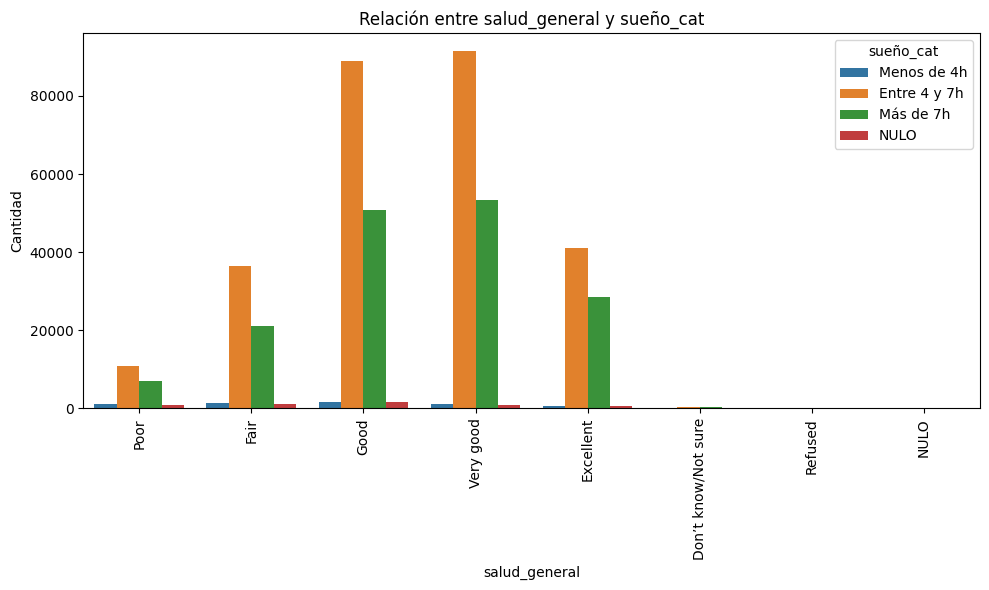

In [8]:
plot_cartegoricas(df, 'salud_general', 'sueño_cat', orden_categorias)

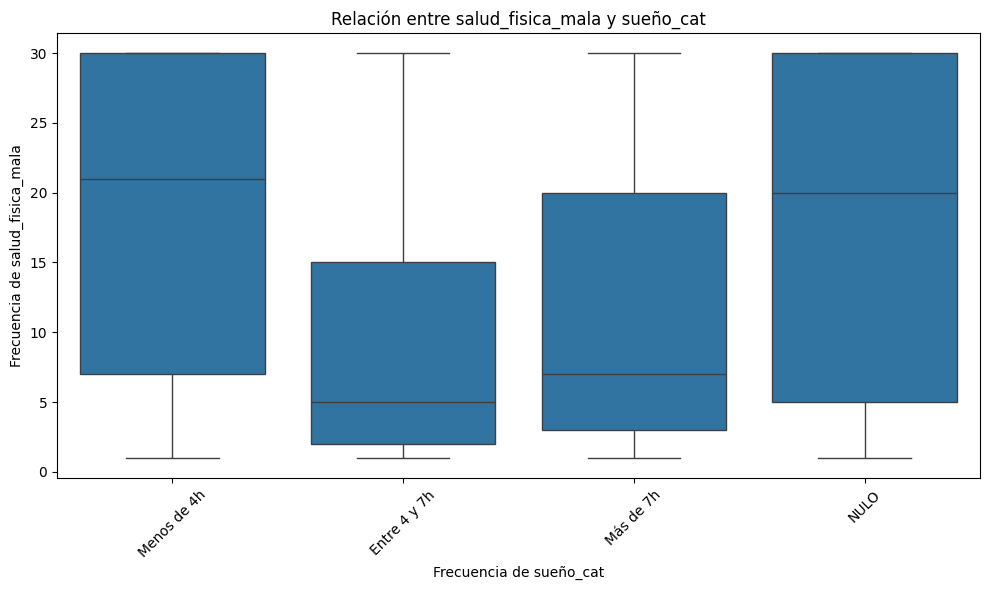

In [9]:
boxplot_cat_num(df, 'sueño_cat', 'salud_fisica_mala', orden_categorias)

*Conclusiones*:

- El grupo de **"Menos de 4h"** de sueño al día, refleja la peor salud de todas. En la gráfica 2, aunque son pocos, tienen una presencia notable en las categorías de salud "Poor". En las *gráficas de cajas (1 y 3)*, sus medianas de días malos son altísimas (20-21 días).

- El grupo **"Entre 4 y 7h"**  presenta indicadores de salud bastante buenos (barras naranjas dominantes en "Good" y "Very Good" y medianas bajas de días malos).

- En cuanto a la **salud mental**, la gráfica 1 muestra que el grupo **"Más de 7h"** es el ganador indiscutible. Tienen la mediana más baja de días malos y la menor dispersión. Aquí, el rango alto es el óptimo.

- En cuanto a la **salud física**:
     - La gráfica 3, el grupo **"Más de 7h"** empeora ligeramente respecto al **grupo "4-7h"**. La mediana de días malos sube. Esto puede ser por los valores mal codificados que se encuentran por encima de las 15h.
     - En la categoría **"Menos de 4h"**, a caja del diagrama no solo es alta, sino que el tercer cuartil y el bigote superior están "pegados" al techo del gráfico (30 días).  Esto indica que una porción masiva (más del 25-30%) de las personas que duermen menos de 4 horas viven con malestar físico todos los días del mes.

- En los tres casos, el grupo **`Nulo`** se asemeja al de **Menos de 4h**, por lo que podemos esclarecer con más rotundidad que las personas que no respondieron de una manera errónea o no contestaron es más problable que pertenzcan a ese grupo.

#### ***4.3. Consumo de alcohol y bienestar general***

El consumo del alcohol es una sustancia tóxica, donde numerosos estudios indica que afecta a la salud a nivel general.

**Por lo que nos planteamos:**

- ¿Las personas con consumo alto reportan peor salud?

- ¿Cómo afecta el alcohol a la salud mental reportada?

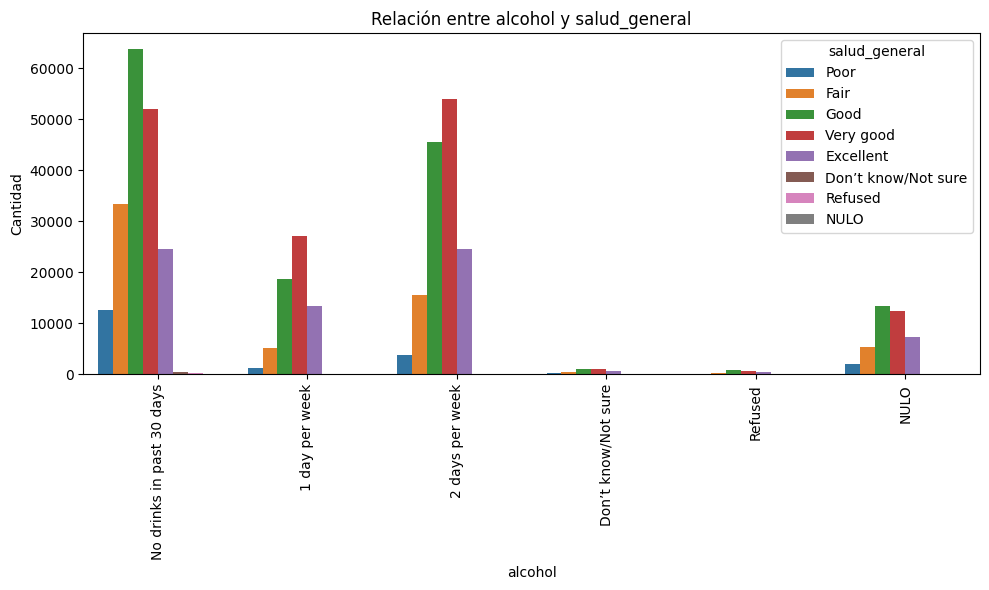

In [10]:
plot_cartegoricas(df, 'alcohol', 'salud_general', orden_categorias)

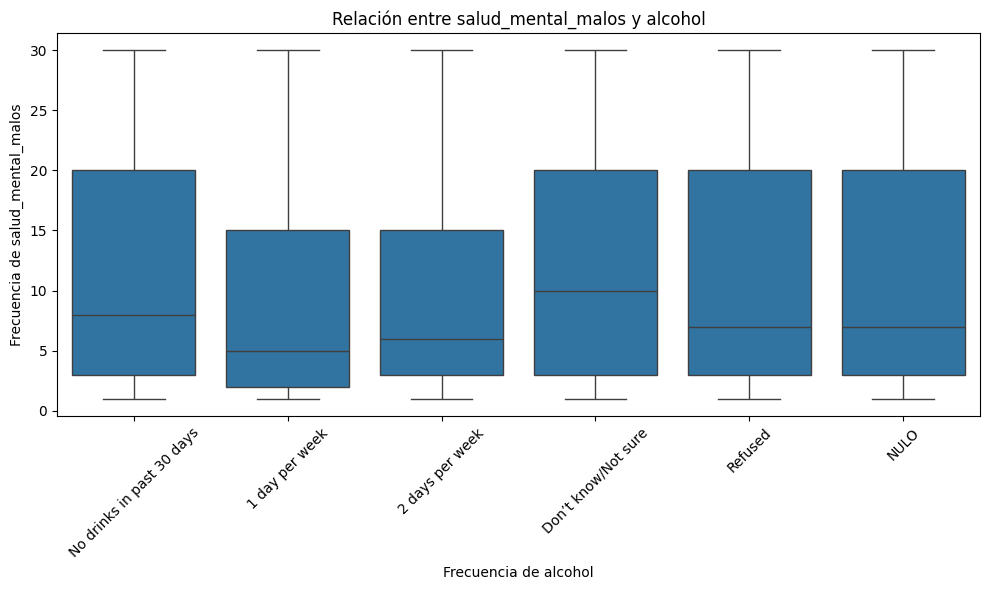

In [11]:
boxplot_cat_num(df, 'alcohol', 'salud_mental_malos', orden_categorias)

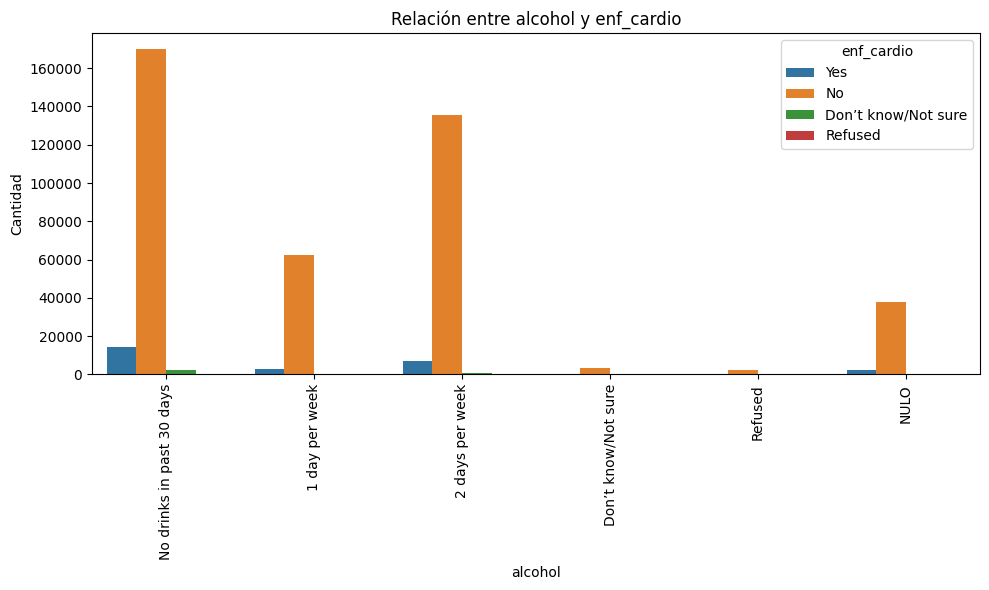

In [12]:
plot_cartegoricas(df, 'alcohol', 'enf_cardio', orden_categorias)

En este mini análisis del alcohol con a **salud general**, la **salud mental** y la presencia o no de **enfermedades cardiovasculares**, podemos sacar conclusiones muy llamativas:

- En las tres variables, el grupo que sale mejor parado no es el que no bebe nada, sino el que bebe con moderación (**`1 día a la semana`**):

    - **Salud General**: Reportan niveles más altos de salud `Excellent` y `Very Good`.
    - **Salud Mental**: Tienen la mediana más baja de días malos (5 días vs 8 de los abstemios).
    - **Cardio**: Tienen una prevalencia menor de enfermedades cardíacas en comparación con los no bebedores.

- El efecto **"Abstemio Enfermo"**: El grupo de `No bebedores` muestra sistemáticamente peores indicadores que los bebedores moderados.

    - **¿Por qué?** No necesariamente porque no beber sea "malo", sino porque este grupo es un "cajón de sastre" que incluye a: personas que nunca han bebido, ex-alcohólicos, personas mayores frágiles y personas con enfermedades crónicas o medicación (como vemos en la gráfica de cardio) que les impide beber.

- **Alcohol** y **Salud Mental**: El factor social

    - La ventaja en salud mental del grupo `1 día a la semana` sugiere que este consumo es probablemente social (una copa con amigos, una cena).
    - La **socialización** actúa como un potente antidepresivo y reductor de ansiedad.
    - Por el contrario, el grupo de `No bebedores` muestra mayor dispersión y medianas más altas de días malos, lo que podría correlacionar con aislamiento social o condiciones de salud limitantes.

*Conlcusiones*:

Los datos muestran una **relación no lineal** entre el consumo de alcohol y la salud. Se observa un patrón consistente donde el consumo moderado (1-2 días/semana) se asocia con los mejores indicadores de salud general, mental y cardiovascular.

Sin embargo, esto debe interpretarse con cautela: es muy probable que la causalidad sea inversa en el grupo de abstemios. Las personas con peor salud física (especialmente cardiovascular) y mental tienden a dejar de beber, concentrando así las patologías en el grupo de 'No consumo', mientras que el consumo moderado parece ser un marcador de una vida social activa y una salud física suficientemente robusta para tolerar el alcohol




#### ***4.4. Hábitos de salud y presencia de enfermedades***

Los hábitos de salud son primordiales para prevenir enfermedades como:
- Cardiovasculares.
- Diabetes
- Asma
- Obesidad.

**Preguntas exploratorias**:

- ¿Los malos hábitos (poco ejercicio, sueño bajo, alcohol) están más presentes en personas con enfermedades crónicas?

- ¿Qué variable de estilo de vida parece tener mayor relación?

- ¿Las enfermedades se agrupan más en ciertos perfiles?


##### *Ejercicio vs Enfermedades*

In [13]:
enfermedades = ['diabetes', 'asma', 'enf_cardio', 'cancer']

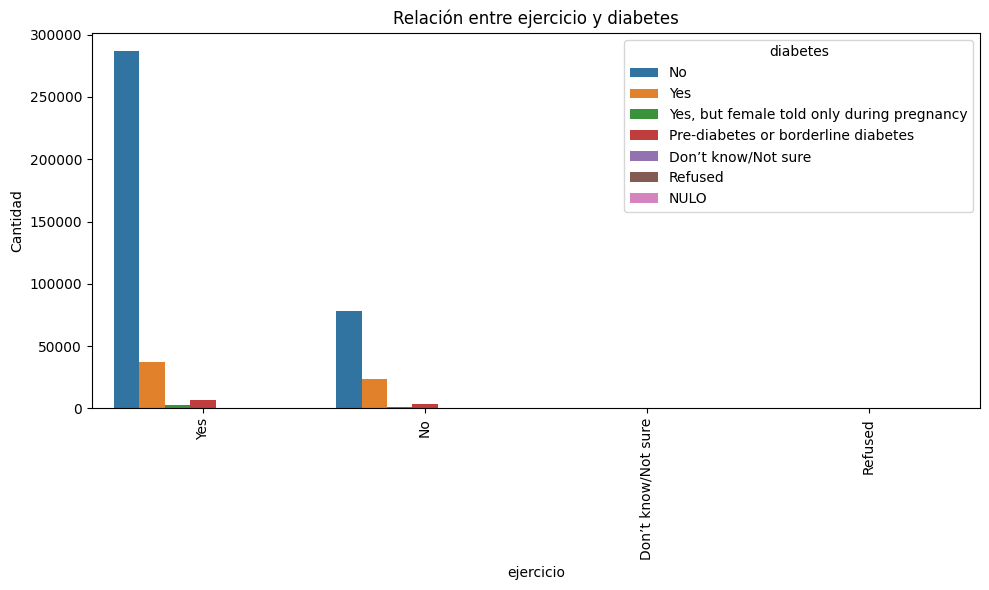

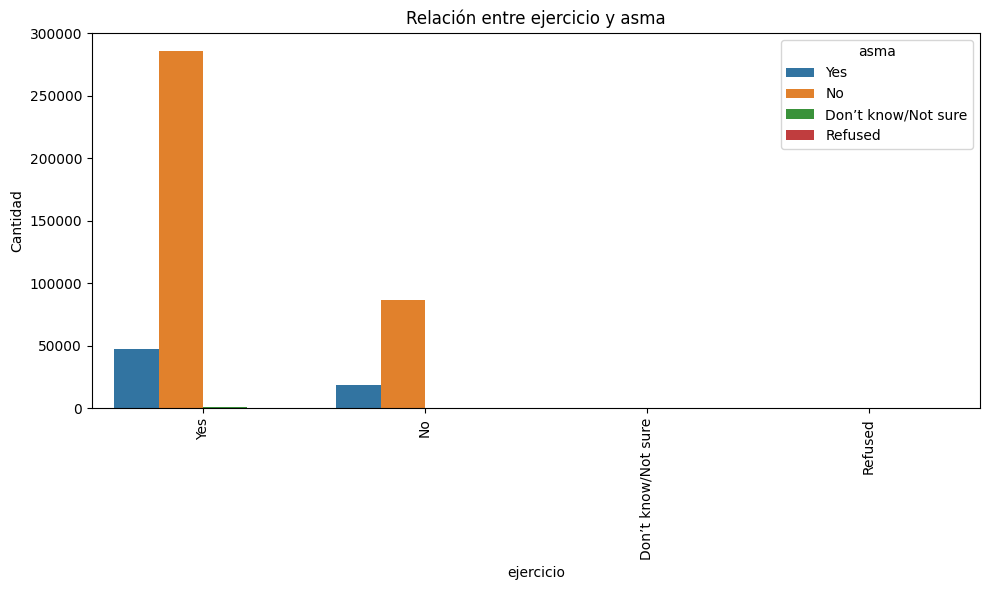

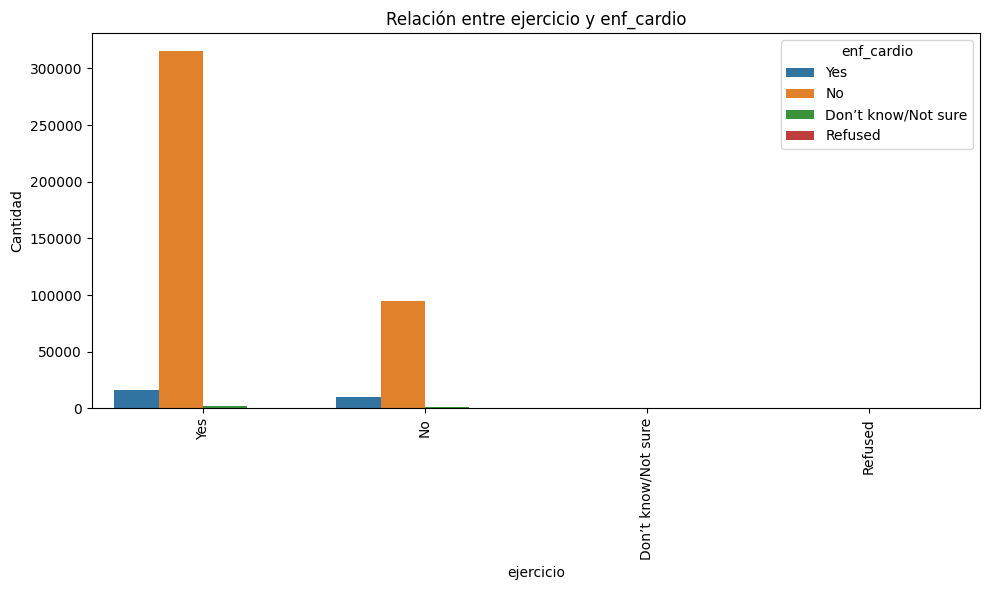

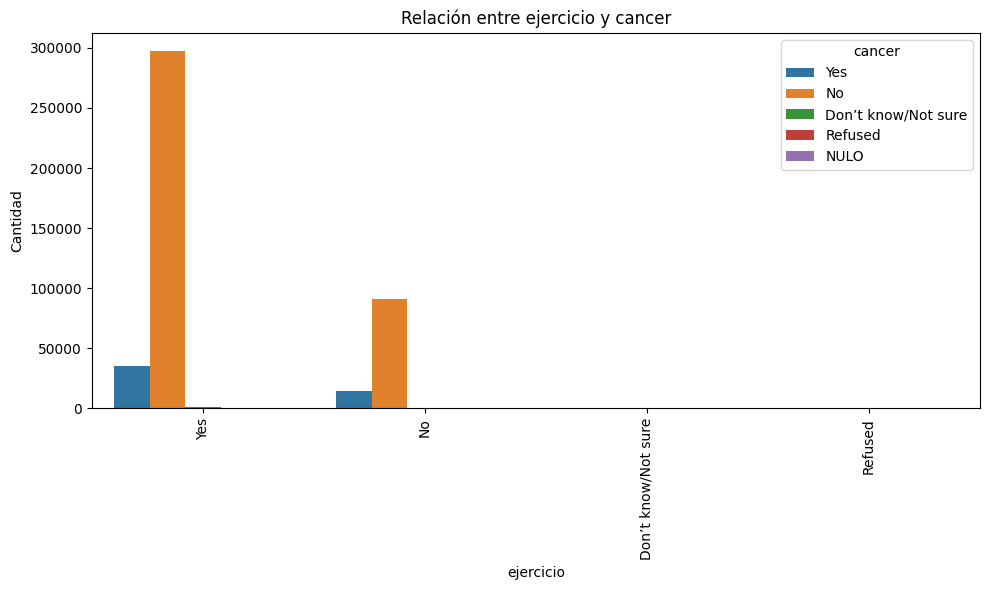

In [14]:
for col in enfermedades:
    plot_cartegoricas(df, 'ejercicio', col, orden_categorias)

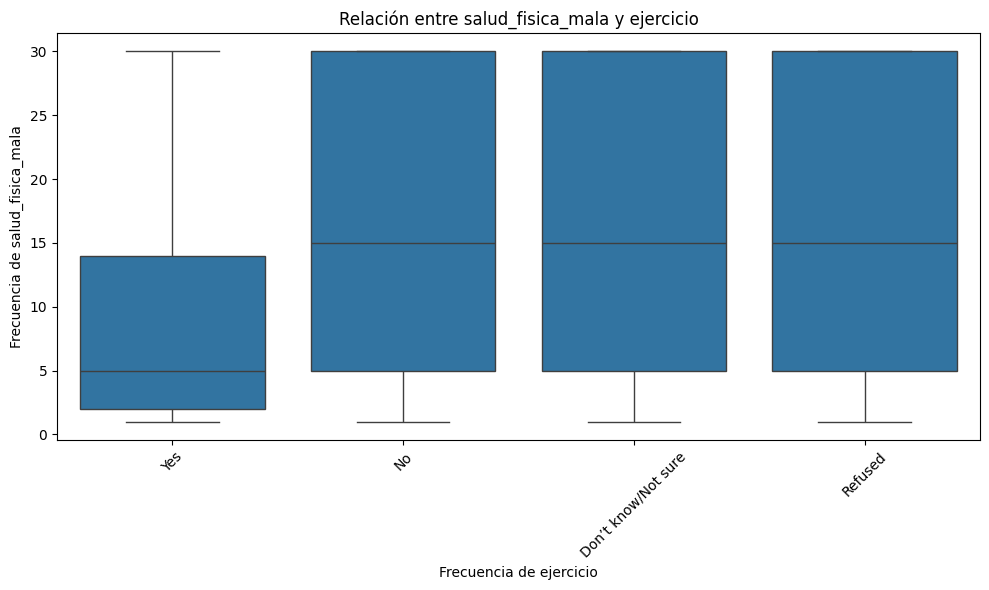

In [15]:
boxplot_cat_num(df, 'ejercicio', 'salud_fisica_mala', orden_categorias)

Tras analizar la variable **`ejercicio`** con enfermedades como la **diabetes, el asma, enfermedades cardiovasculares, el cáncer y la salud física general**, podemos clasificar las enfermedades en tres comportamientos distintos frente al deporte:

1. **Diabetes y Dolor Físico**:

Aquí la relación es importante. El sedentarismo es el mejor amigo de estas condiciones.

- **Diabetes**: La proporción de enfermos se dispara en el grupo sedentario.
- **Salud Física**: No hacer ejercicio triplica los días de malestar e influye a que una gran parte del grupo sufra dolor crónico (30 días/mes).

**Conclusión**: El ejercicio actúa como el factor protector más potente aquí.

2. **Enfermedad Cardiovascular y Cáncer**:

Aquí se puede observar que las personas que sufren alguna enfermedad cardiovascular o algún tipo de cáncer, pueden realizar algo de actividad física a **modo preventivo**.

Aunque el riesgo relativo es menor en los deportistas, encontramos a mucha gente con enfermedades cardíacas y cáncer haciendo ejercicio (más que sedentarios enfermos).

El ejercicio reduce el riesgo relativo, pero no elimina la enfermedad (hay mucha gente activa enferma). Lo más destacado aquí es el comportamiento: los enfermos de cáncer y corazón no abandonan el ejercicio. Vemos un perfil de "paciente activo" que usa el deporte probablemente como herramienta de control de la enfermedad y recuperación.

**Conclusión**: Tener un problema de corazón no impide hacer ejercicio; al contrario, parece que el diagnóstico motiva a los pacientes a moverse (prescripción médica), rompiendo el círculo vicioso del sedentarismo.

3. **La condición neutra: Asma**

El asma rompe el patrón.

La proporción de asmáticos es muy similar entre quienes hacen ejercicio y quienes no.

**Conclusión**: El asma es una condición que, aunque crónica, no actúa como una barrera limitante para la actividad física en la mayoría de la población. Los asmáticos son casi tan activos como los no asmáticos.

*Resumen*:

El análisis desmiente que la enfermedad sea siempre una barrera para el ejercicio. Mientras que en el asma la actividad física se mantiene estable y en las enfermedades cardiovasculares y en el cáncer incluso parece incentivarse tras el diagnóstico, es en la diabetes y el bienestar físico general donde el sedentarismo muestra su predominancia. Observamos que la inactividad no solo correlaciona con la aparición de diabetes, sino que está relacionada a un deterioro severo de la calidad de vida, triplicando la frecuencia de días de malestar físico.


##### *Sueño vs Enfermedades*

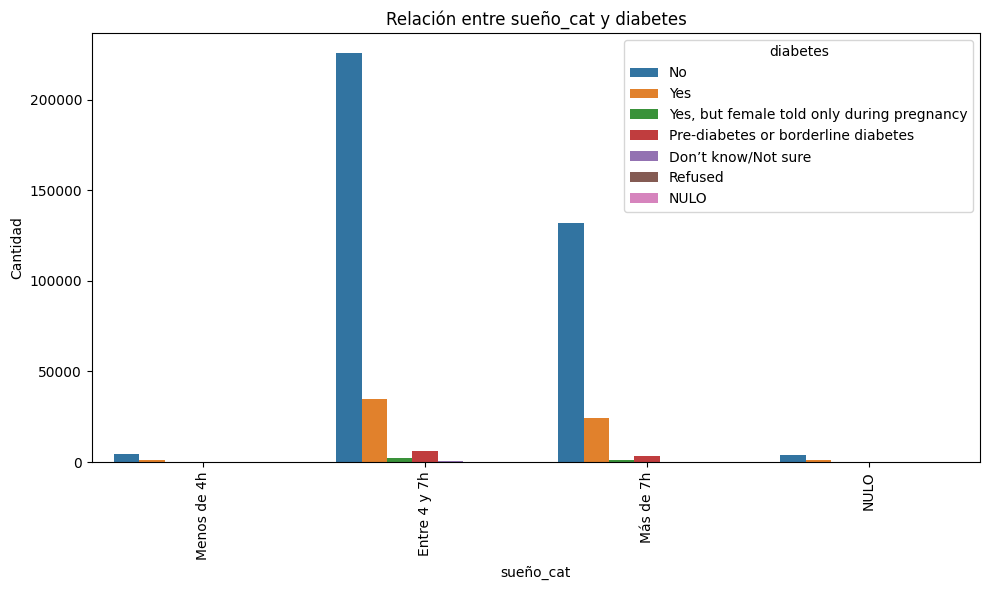

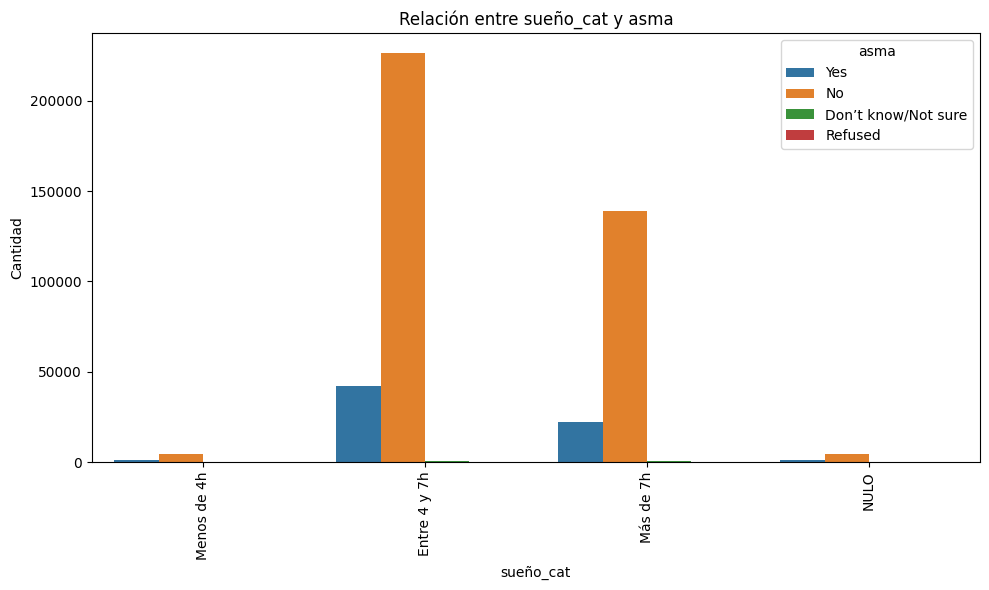

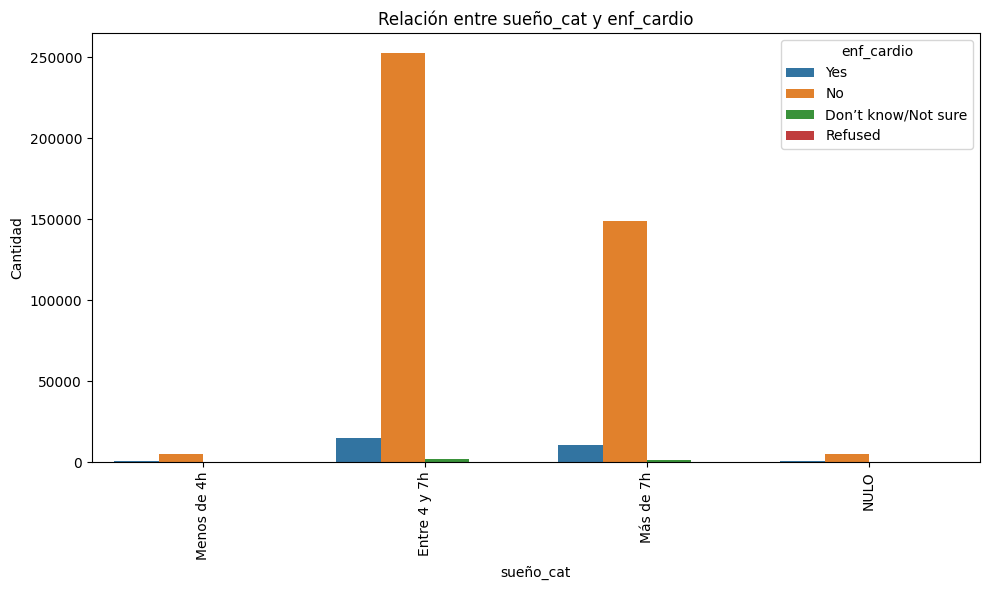

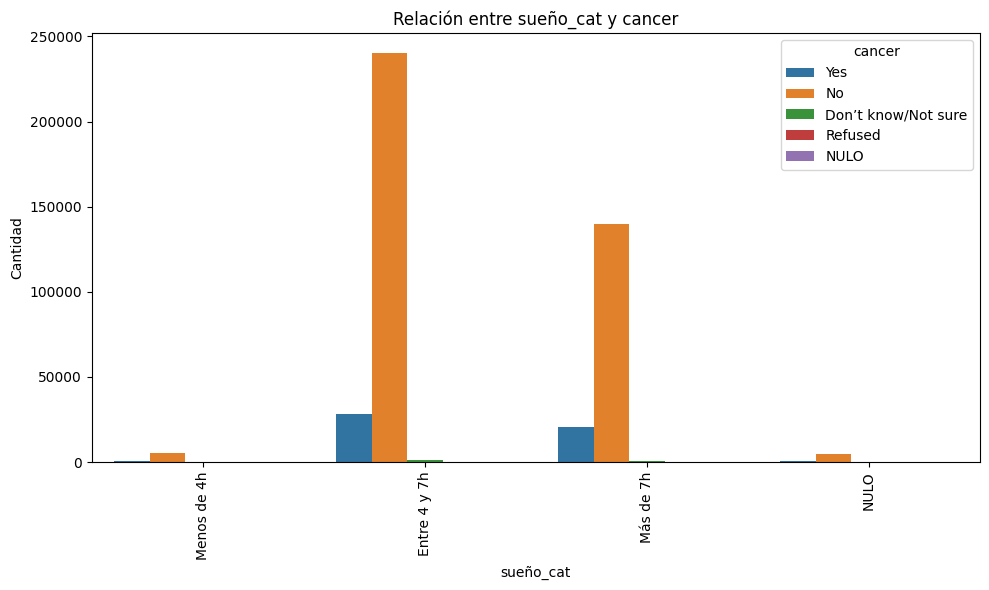

In [16]:
for col in enfermedades:
    plot_cartegoricas(df, 'sueño_cat', col, orden_categorias)

Tras analizar **`sueño_cat`** con  la **diabetes, asma, enfermedades cardiovasculares y cáncer**, podemos las siguinete conclusiones:

1. **Diabetes y enfermedades cardiovasculares**:
 - Tanto dormir muy poco (<4h) como dormir mucho (>7h) son malas señales. (Hay que tener en cuenta que hay anomalías en estos valores y pueden estar asociadas)
    - (<4h): El estrés y la falta de descanso dañan el metabolismo y el corazón.
    - (>7h): Aquí funciona la causalidad inversa. La gente no enferma por dormir; duerme porque está enferma. La fatiga asociada a la diabetes y la insuficiencia cardíaca empuja a los pacientes a este grupo. Aunque hay que tener en cuenta las anomalías que las categorizamos.

2. **Asma**:
- Aquí dormir mucho (>7h) no es malo (de hecho, es bastante seguro). El peligro está en dormir poco (<4h).
- El asma rompe el sueño. La tos y la falta de aire despiertan al paciente. Por eso, una gran cantidad de asmáticos se concentran en el grupo de insomnio severo. La enfermedad es la causa directa de la falta de sueño.

*En resumen*:

El análisis de las horas de sueño revela que el descanso actúa como un indicador bidireccional de la salud. Identificamos el rango de 4 a 7 horas como el 'punto óptimo' asociado a la menor prevalencia de todas las enfermedades estudiadas.

Las desviaciones de este rango señalan problemas distintos: el sueño insuficiente (<4h) correlaciona fuertemente con patologías sintomáticas que interrumpen el descanso, como el asma. Por otro lado, el sueño prolongado (>7h) no parece ser una causa, sino una consecuencia de enfermedades sistémicas como la diabetes, cardiopatías y cáncer, donde la fatiga crónica y la necesidad de recuperación aumentan la demanda de sueño de los pacientes.


##### *Fumar y alcohol vs Enfermedades*

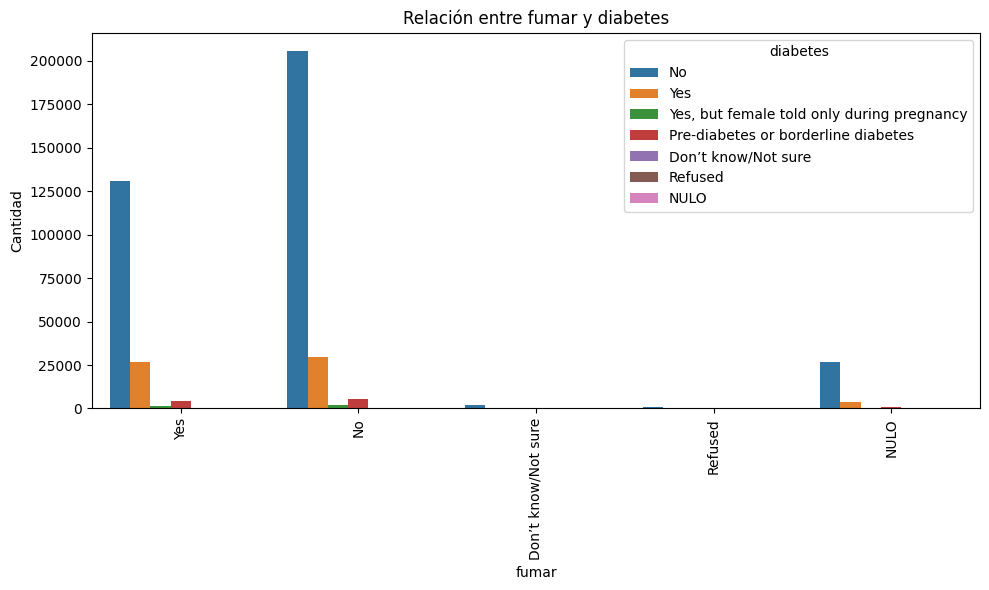

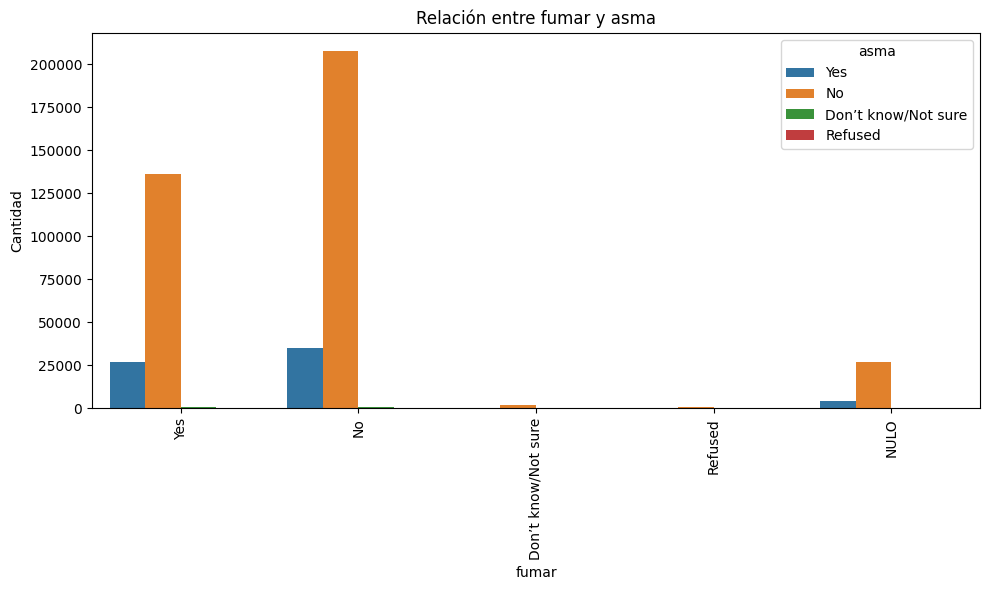

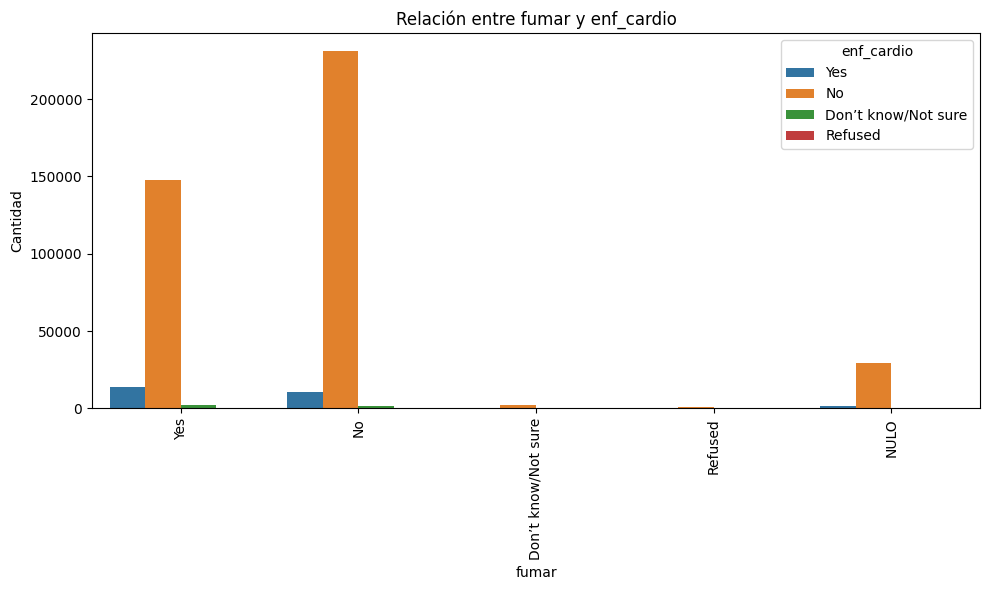

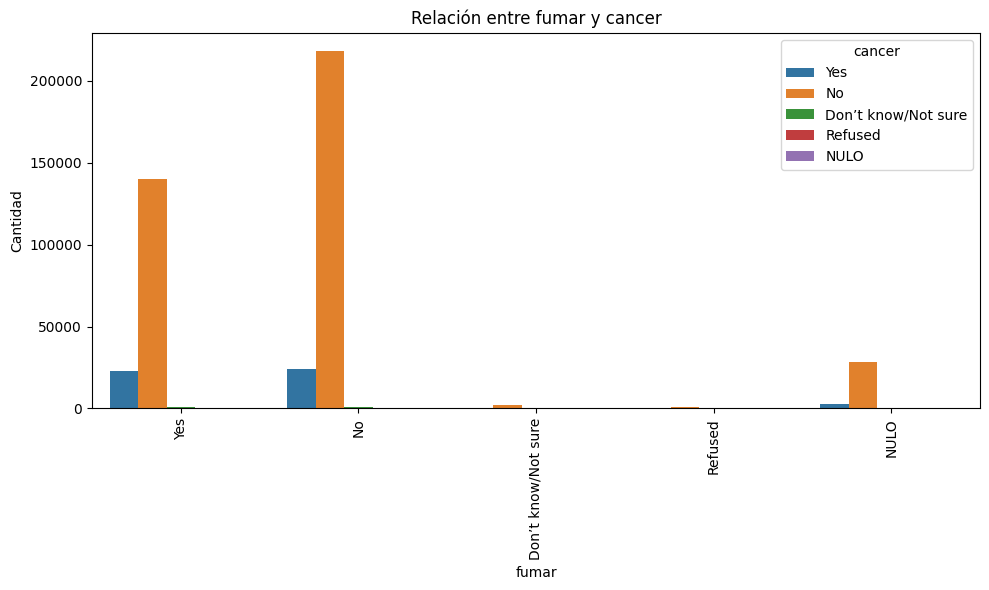

In [17]:
for col in enfermedades:
    plot_cartegoricas(df, 'fumar', col, orden_categorias)

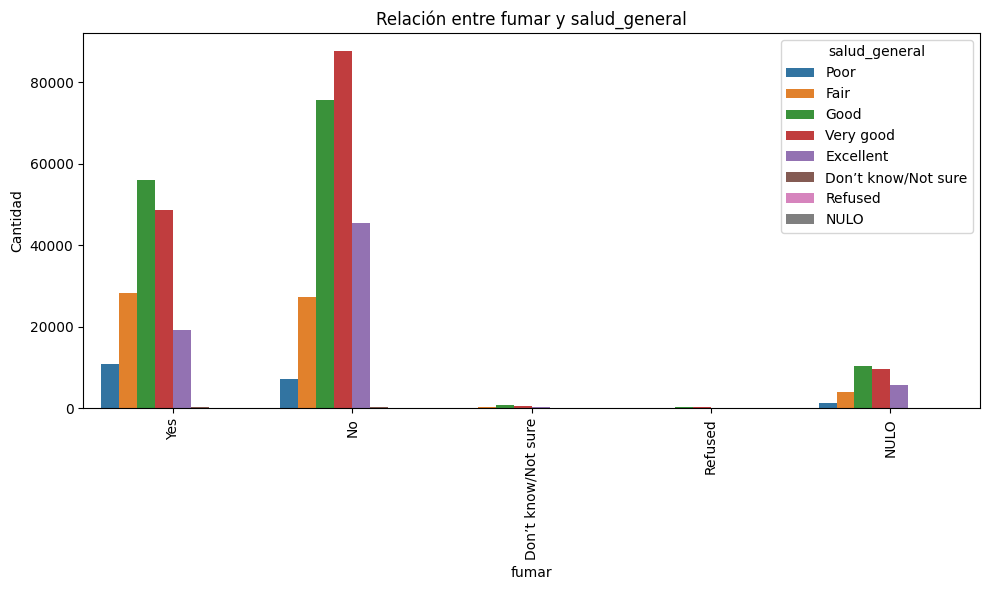

In [18]:
plot_cartegoricas(df, 'fumar', 'salud_general', orden_categorias)

Tras analizar la variable del **tabaco** con las enfermedades que estamos viendo, podemos explicar:

- A pesar de que el grupo de fumadores es mucho más pequeño que el de no fumadores, producen una cantidad absoluta de **enfermos de cáncer y corazón** casi idéntica. Esto significa que la densidad de enfermedad en este grupo es altísima. **Fumar** es, sin duda, el **factor de riesgo más potente** para estas dos patologías mortales.

- Respecto al **asma**, una gran cantidad de personas con asma continúan fumando. Aunque el tabaco empeora la condición, el diagnóstico no parece ser suficiente para frenar el hábito en miles de personas, lo que subraya el componente adictivo de la sustancia por encima del bienestar físico.

- Analizando la **salud general**, no hace falta tener cáncer para sufrir los efectos. La última gráfica demuestra que **el fumador promedio se siente peor** en su día a día. Mientras que el no fumador tiende a sentirse "Muy bien" o "Excelente", el fumador baja sus expectativas a "Bien" o "Regular". El tabaco elimina la sensación de vitalidad plena.

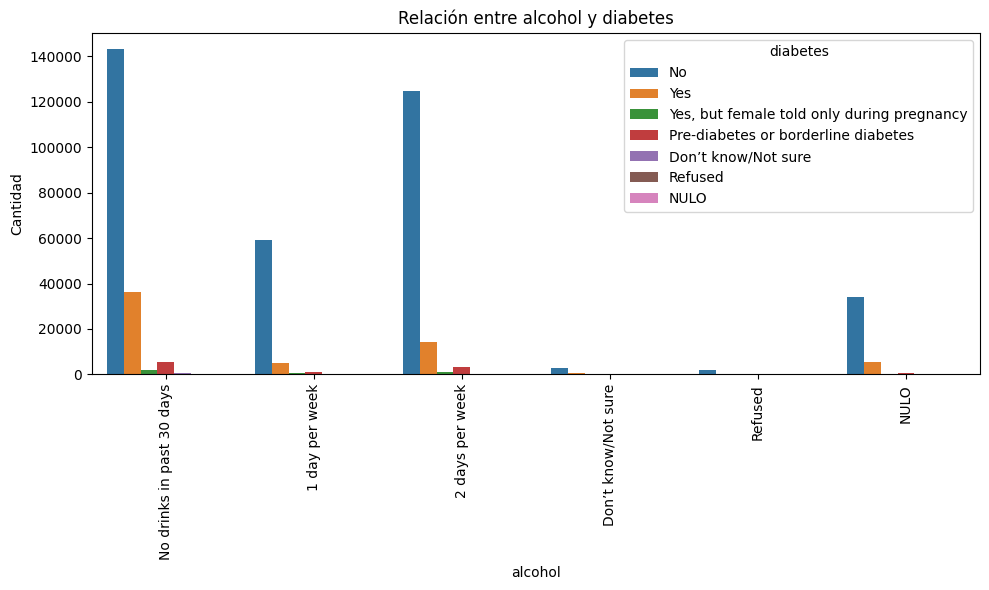

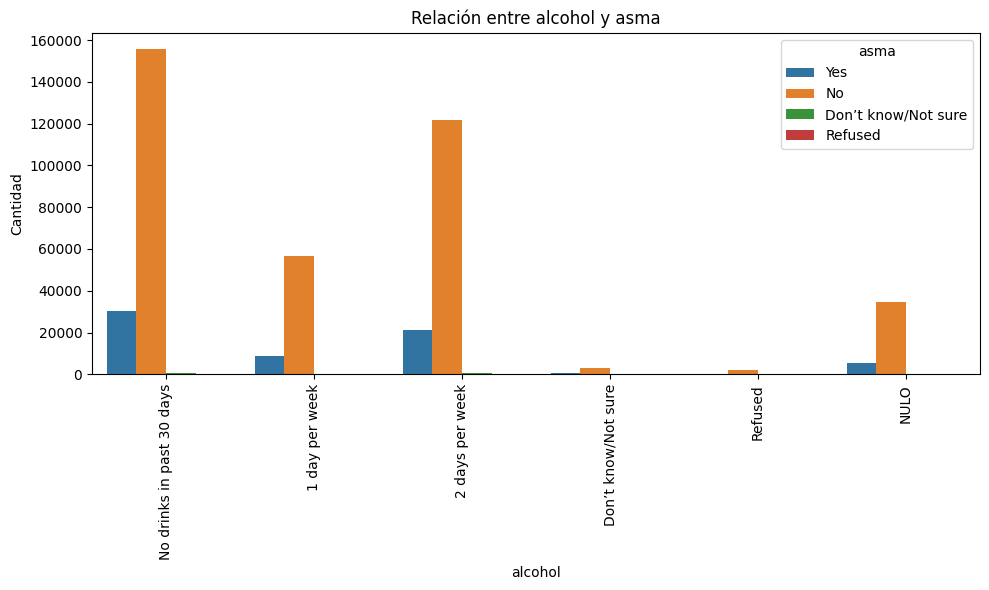

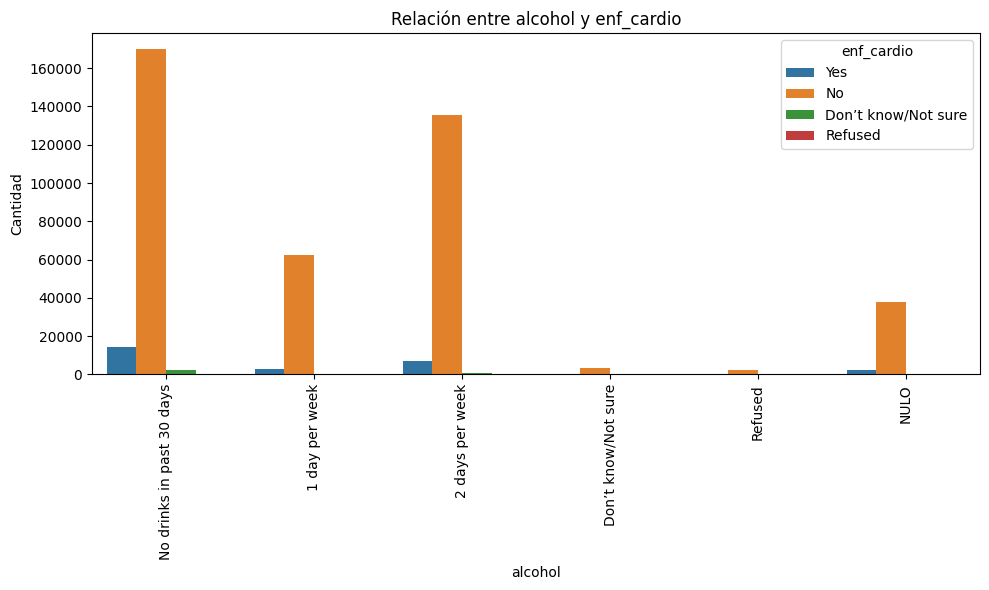

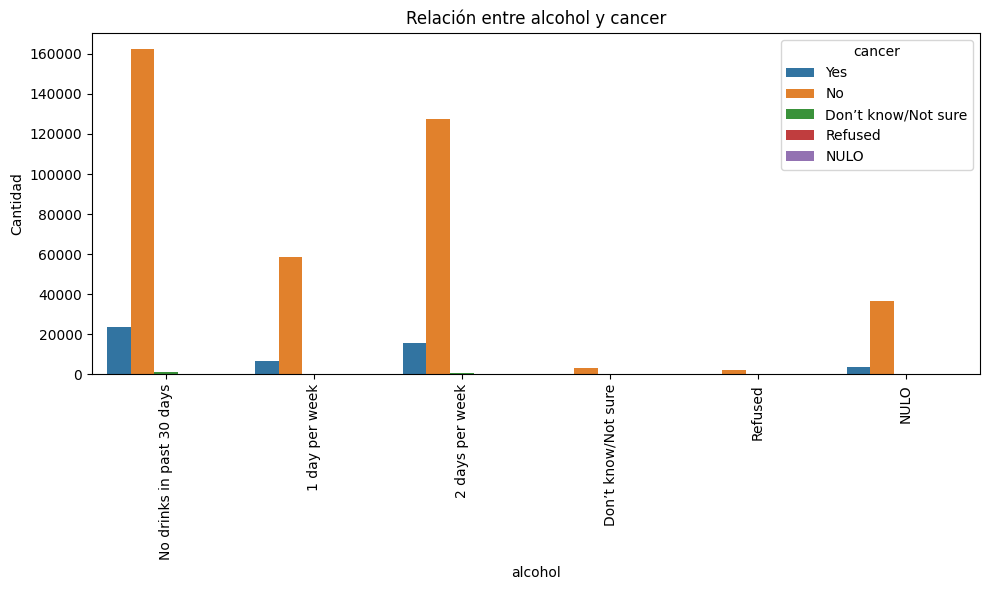

In [19]:
for col in enfermedades:
    plot_cartegoricas(df, 'alcohol', col, orden_categorias)

Tras cruzar el **alcohol** con con las enfermedades descritas, (sumado a lo que vimos de las cardiopatías previsamente), podemos observar:

- En las enfermedades graves y metabólicas (**diabetes, cardiopatías y cáncer**), el grupo de "`No bebedores`" presenta sistemáticamente los peores indicadores de salud. Es decir, no es que la abstinencia cause la enfermedad, sino que la enfermedad causa la abstinencia. El diagnóstico actúa como un filtro que mueve a la gente del grupo de bebedores al de no bebedores.

- El **grupo que consume alcohol con moderación** (1 día a la semana) presenta los mejores ratios de salud en casi todas las gráficas. Beber socialmente suele ser un marcador de funcionalidad. Indica que la persona tiene vida social, energía y una salud lo suficientemente robusta como para tolerar el alcohol sin interferir con medicamentos o condiciones graves.

- El **asma** es la única condición que rompió ligeramente este patrón. Al ser una enfermedad que a menudo permite una vida normal y no tiene tantas contraindicaciones dietéticas estrictas como la diabetes o la quimio, los pacientes asmáticos no abandonan el alcohol en masa. Su distribución se parece mucho más a la de la población general.

##### *IMC vs Enfermedades*

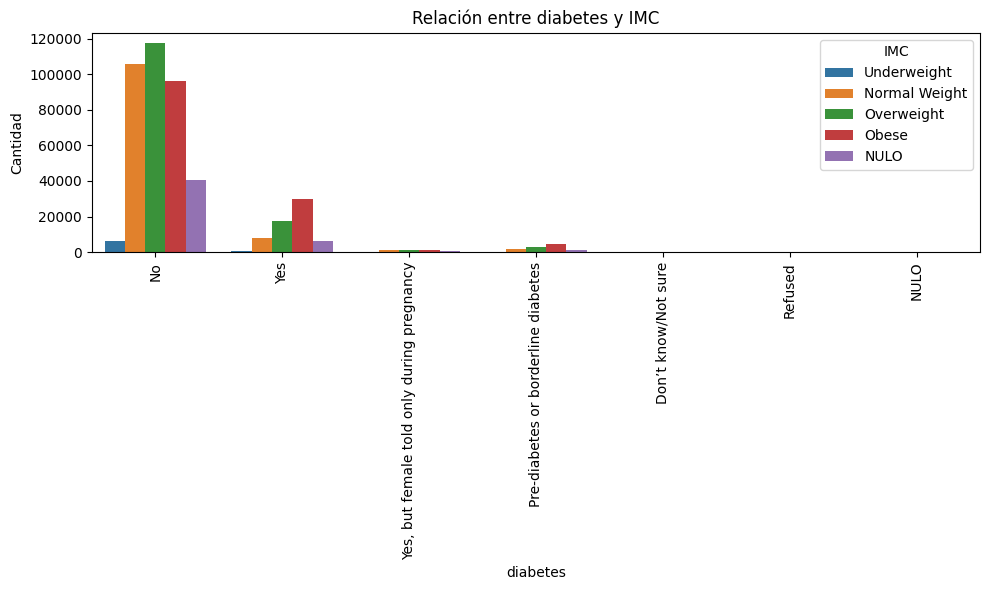

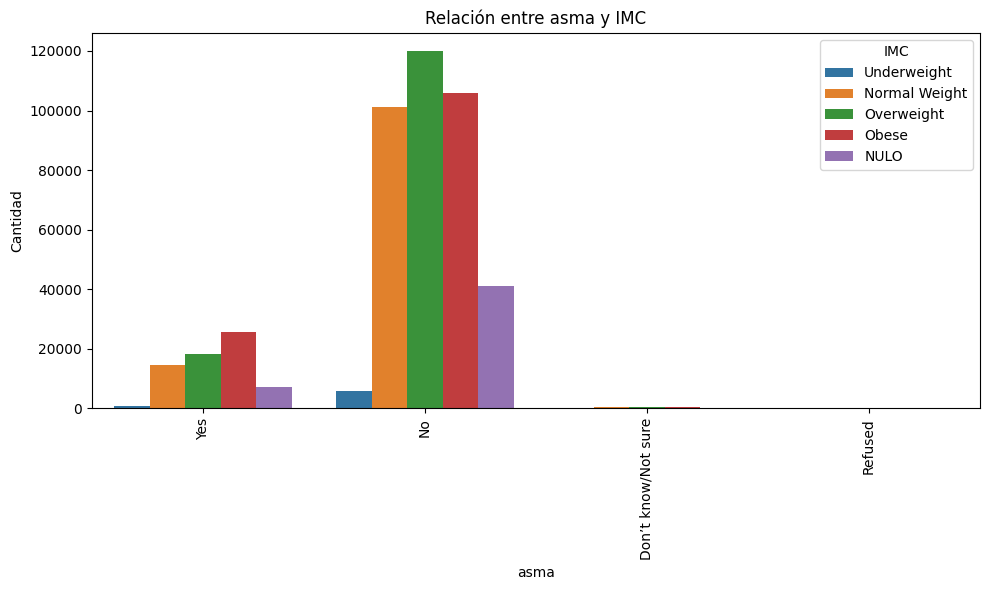

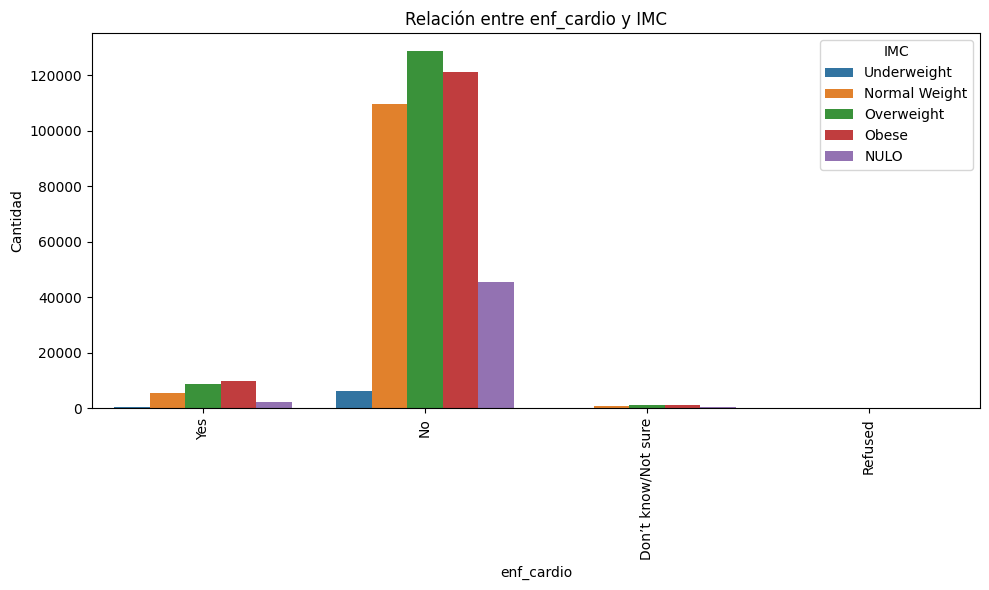

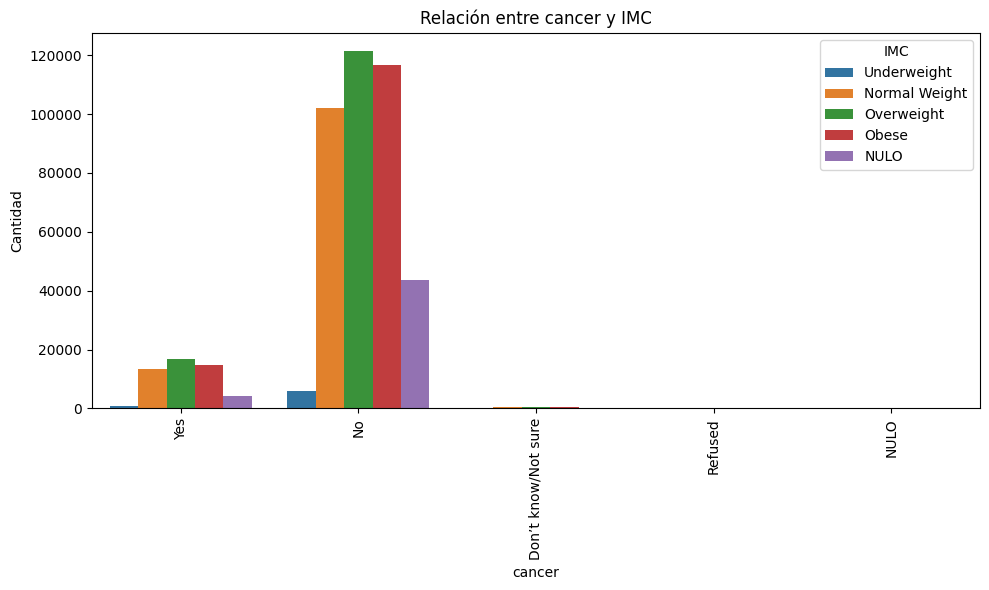

In [20]:
for col in enfermedades:
    plot_cartegoricas(df, col, 'IMC', orden_categorias)

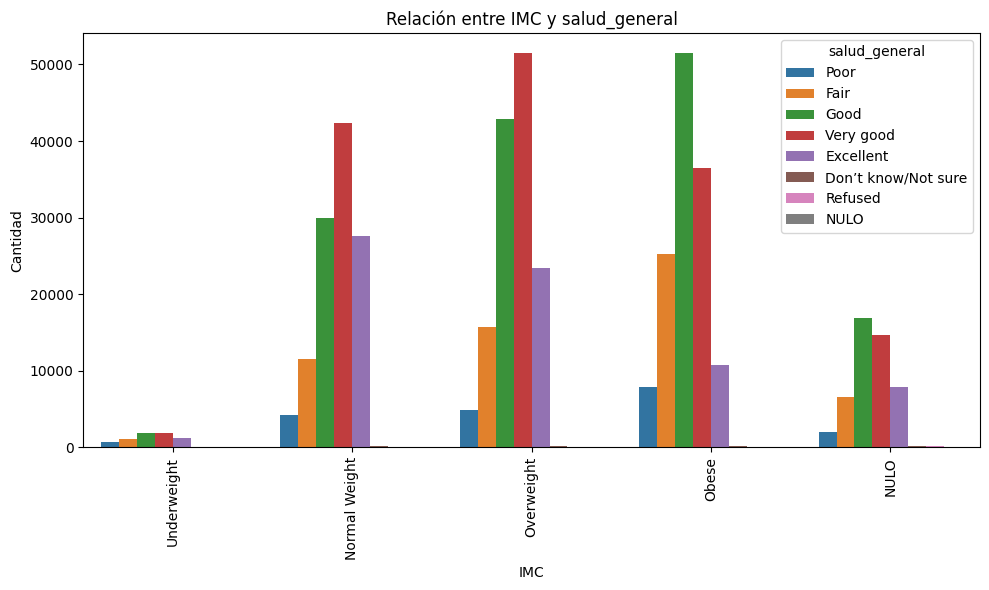

In [21]:
plot_cartegoricas(df, 'IMC', 'salud_general', orden_categorias)

Reacionando el **IMC** con las enfermedades y la salud general, podemos observar:

- Respecto a la **diabetes y las enfermedades cardiovasculares**, la relación con el IMC es lineal y agresiva.
    - **Diabetes**: Es el caso más extremo. La obesidad multiplica el riesgo de forma exponencial. Es casi una condición necesaria en la muestra para desarrollar la enfermedad.
    - **Cardipatías**: El riesgo sube escalón a escalón (Normal -> Sobrepeso -> Obesidad), duplicándose en el extremo.

- En cuanto al **asma**, observamos un "adelantamiento". La obesidad supera al sobrepeso como la categoría más frecuente entre los enfermos. Por lo que el peso comprime el sistema respiratorio, agravando la condición.

- Por lo tanto, viendo la **salud general** de las personas:
    - El "**Peso Normal**" es el único estado asociado masivamente a sentirse "Excelente".
    - Entrar en **Obesidad** elimina casi por completo esa sensación de excelencia y predominando la salud "**Regular**" o "**Pobre**", independientemente de si tienes una enfermedad diagnosticada o no.

##### *Salud mental vs Enfermedades*

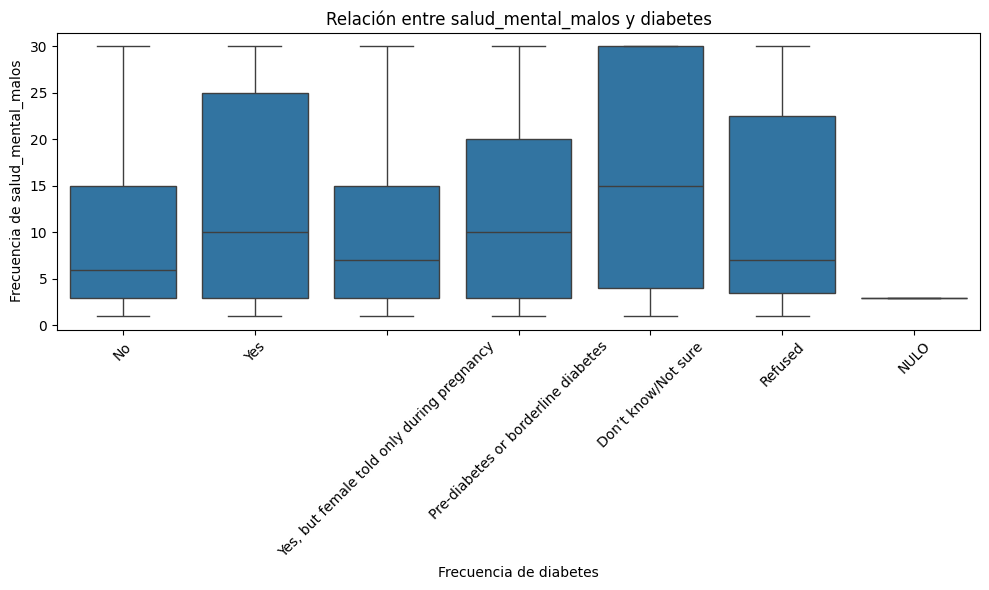

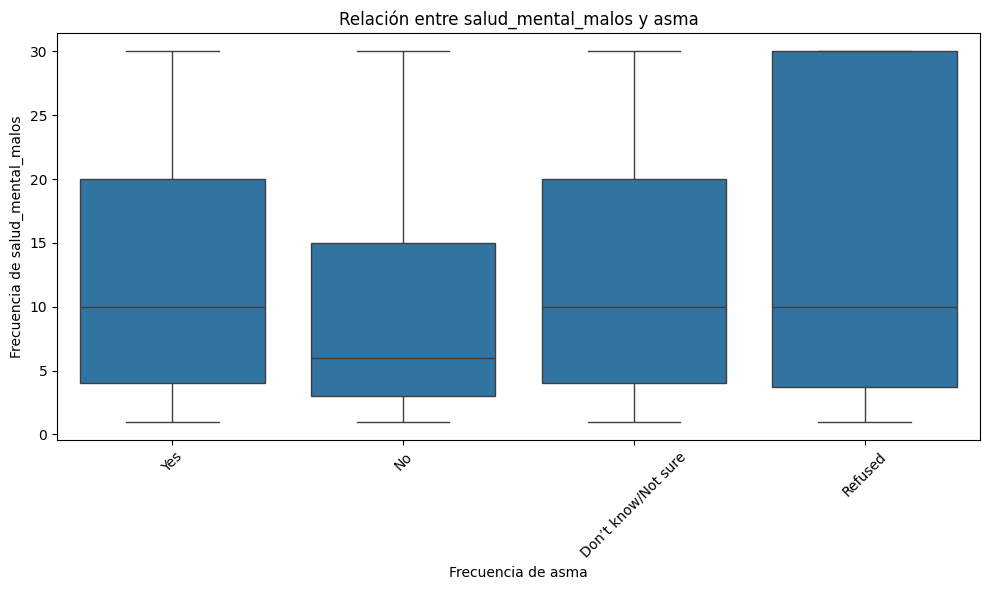

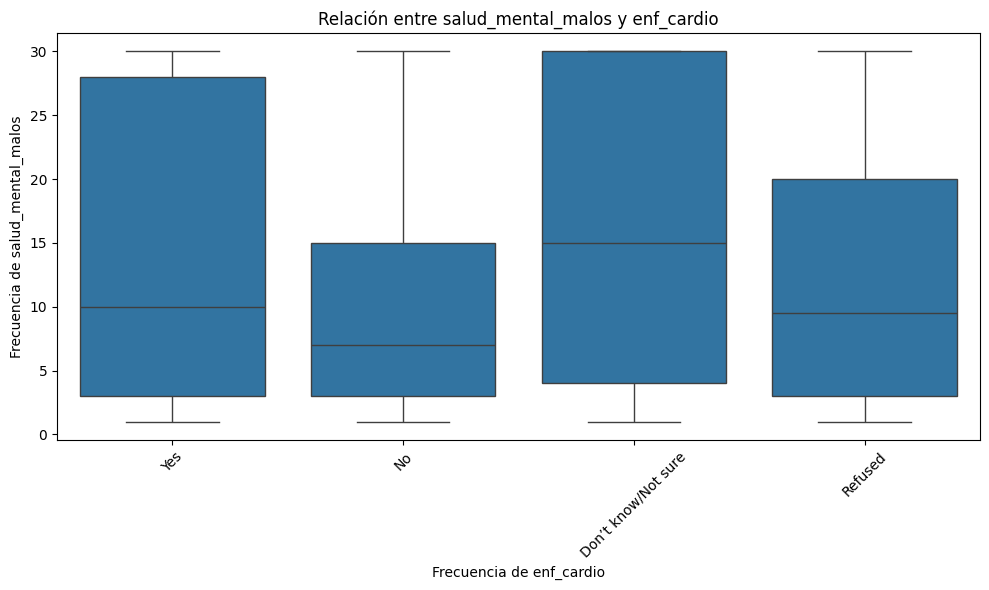

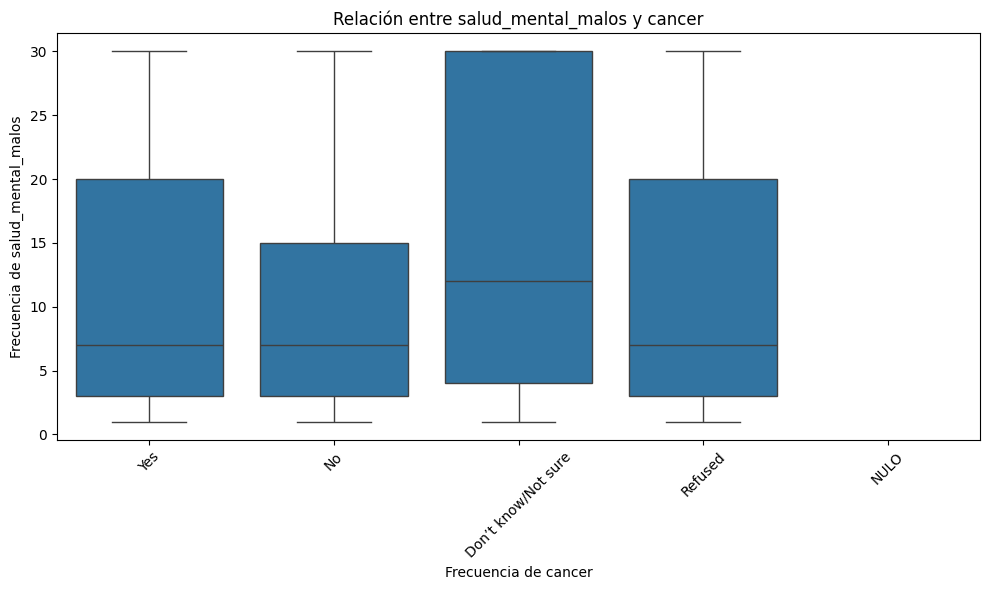

In [22]:
for col in enfermedades:
    boxplot_cat_num(df, col, 'salud_mental_malos', orden_categorias)

Viendo como la **salud mental** puede afectar a las enfermedades, destacamos:

- No todas las enfermedades golpean la mente igual:
    - Las **enfermedades cardiovasculares y la diabetes** son las más devastadoras para el ánimo. Duplican la mediana de días malos y condenan a una gran parte de los pacientes a un malestar crónico. La limitación física constante de estas enfermedades parecen agotar la salud mental.
    - El **asma** genera un deterioro claro (el doble de días malos que los sanos), probablemente vinculado a la ansiedad y la falta de sueño.
    - El **cáncer** Es la excepción. Muestra una gran polarización: mientras el paciente promedio mantiene una salud mental sorprendentemente robusta (similar a los sanos), existe un grupo de riesgo que sufre mucho.

- En todas las gráficas, el grupo "`Don't know / Not sure`" presenta indicadores de salud mental pésimos. La incertidumbre médica, la falta de diagnóstico y la confusión sobre el propio estado de salud son factores extremadamente tóxicos para el bienestar mental, superando a menudo el impacto del diagnóstico.

In [23]:
df.columns

Index(['ejercicio', 'asma', 'cancer', 'grupo_edad', 'ingresos', 'educacion',
       'empleo', 'estado', 'IMC', 'sueño_h', 'fumar', 'alcohol',
       'salud_mental_malos', 'salud_general', 'salud_fisica_mala', 'diabetes',
       'enf_cardio', 'sueño_cat'],
      dtype='object')

### **5. Relación entre los datos sociodemográficos y la salud**

- ¿Tiene relación la edad, la educación, los ingresos y el tipo de empleo en el bienestar de las personas?

Lo analizaremos tanto con al **salud mental** como con la **salud general**.

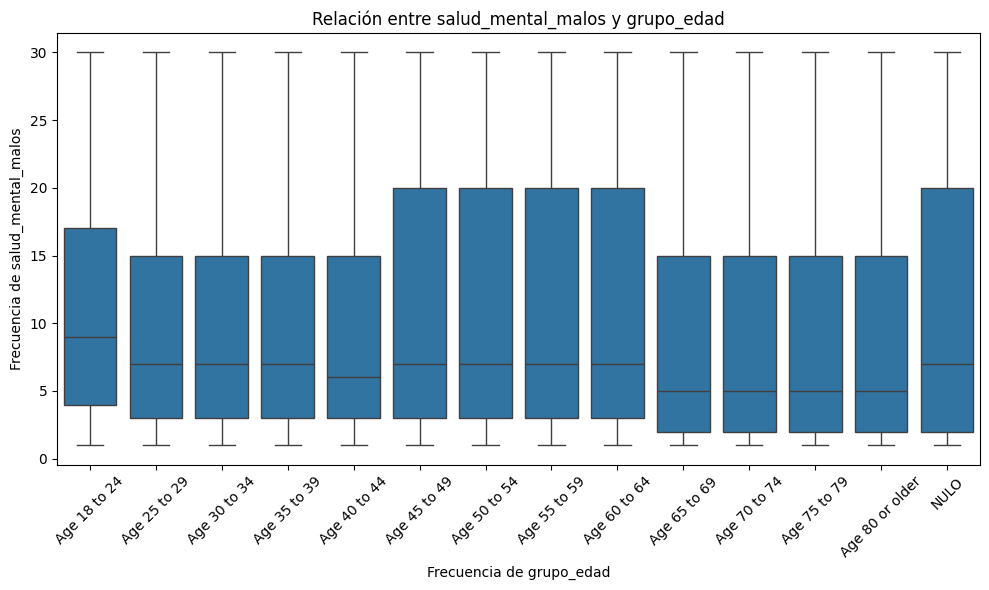

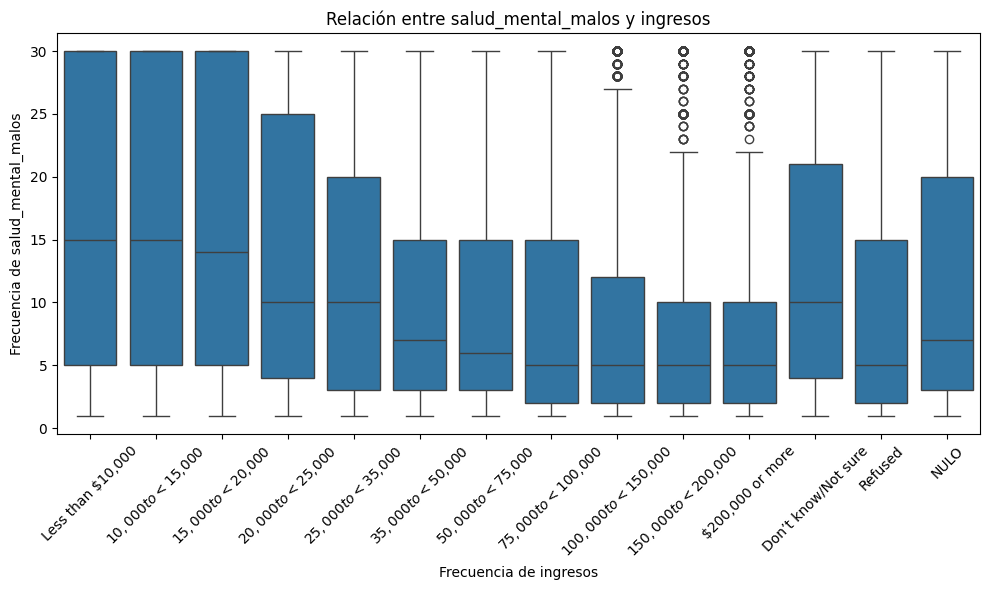

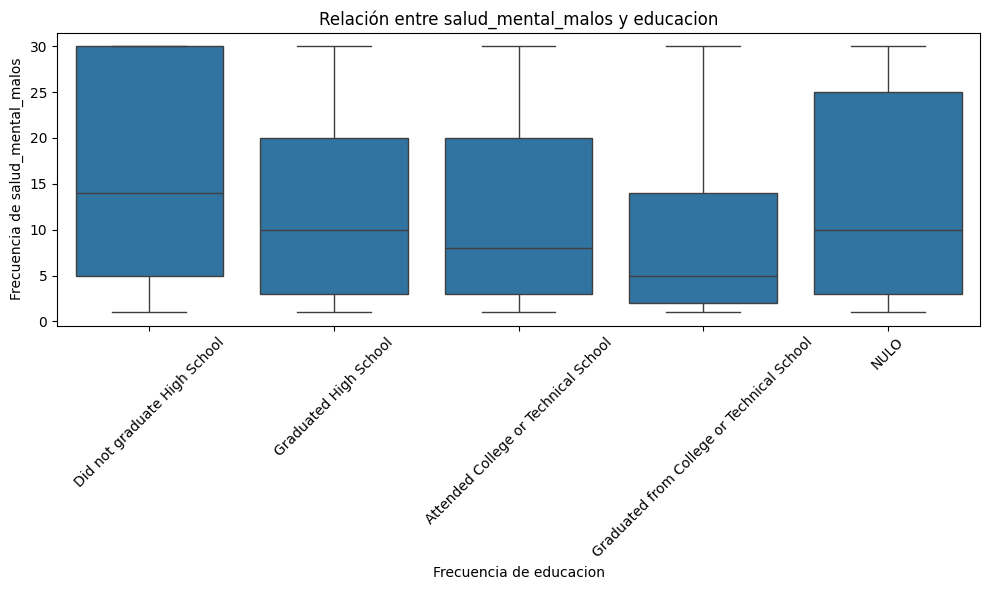

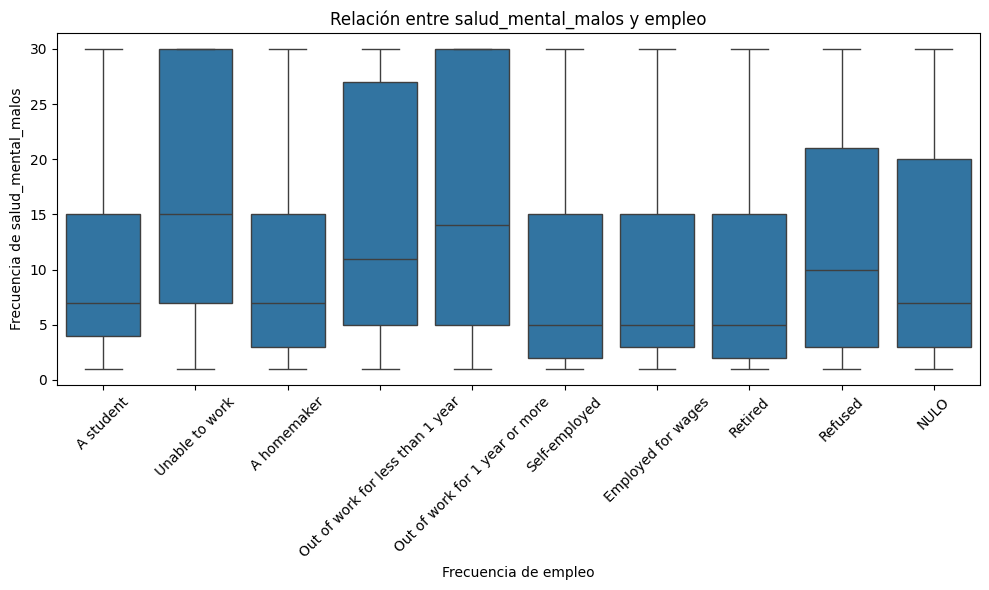

In [24]:
datos = ['grupo_edad', 'ingresos', 'educacion', 'empleo']

for col in datos:
    boxplot_cat_num(df, col, 'salud_mental_malos', orden_categorias)

Tras analizar estos datos demográficos con la salud mental, podemos concluir:

- Los **peores indicadores de salud mental** se concentran en una intersección clara: ingresos bajos (<$20k), bajo nivel educativo (Sin secundaria) e incapacidad para trabajar. Esto sugiere que la salud mental es, en gran medida, una cuestión de recursos. La falta de herramientas económicas y cognitivas para afrontar la vida genera un sufrimiento crónico.

- Contra el estereotipo de la "tristeza en la vejez", los datos muestran lo contrario:
    - Los jóvenes (18-24) son el grupo demográfico más angustiado.
    - Los jubilados (+65) son el grupo más feliz y estable.
    - Esto quiere decir que la **experiencia vital y la reducción de cargas laborales/familiares** actúan como factores protectores potentes.

- El trabajo y la educación actúa de protección, es decir, no se trata solo de dinero, sino que tener un **título universitario y un empleo** (ya sea por cuenta ajena o propia) **reduce drásticamente los días de mala salud mental**. Estos factores aportan propósito, rutina y estatus, elementos que parecen ser tan vitales para la mente como la propia salud física.

> ¿Estas características influirá tanto en el estado de salud en general?

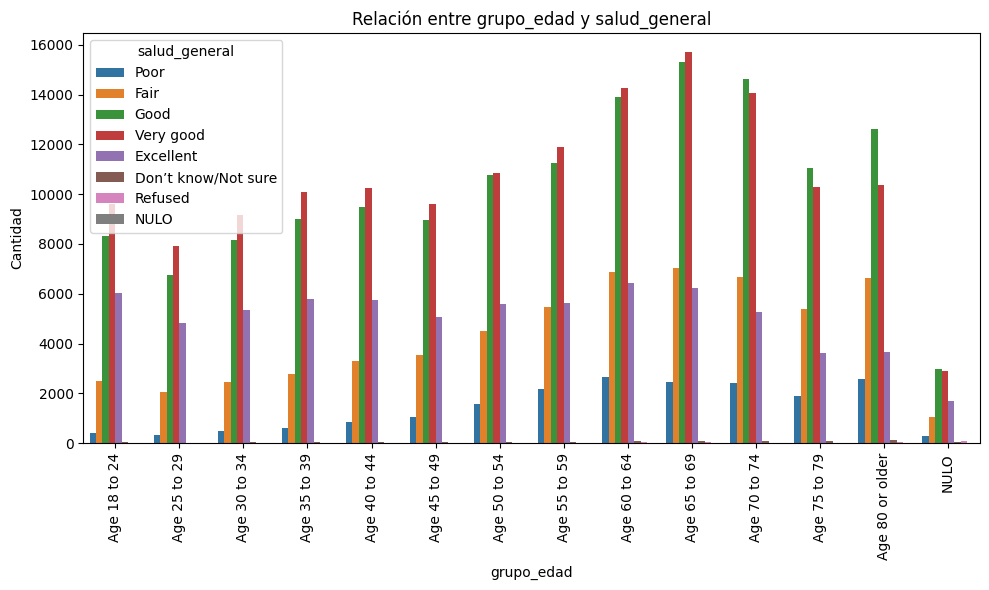

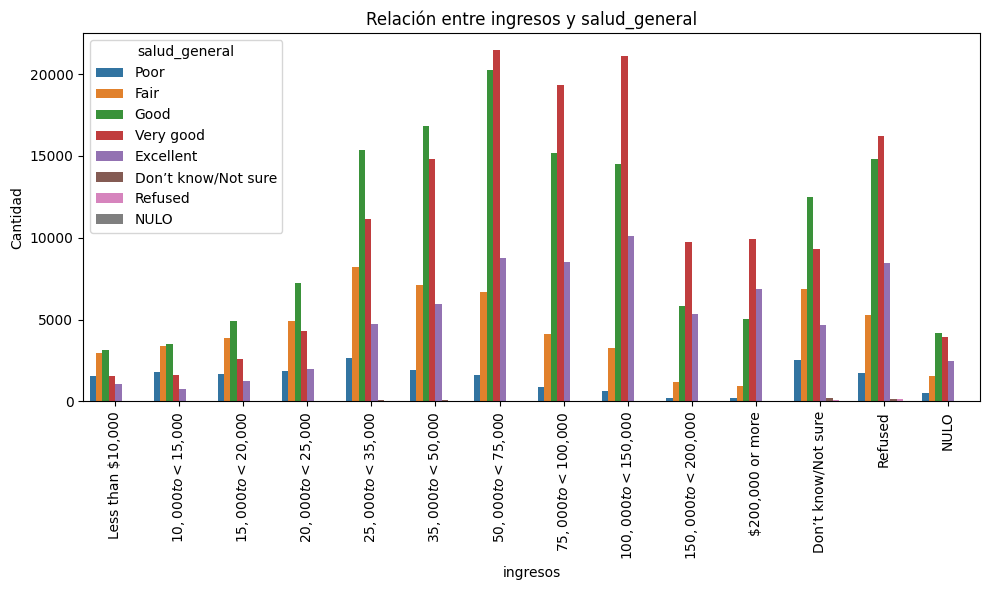

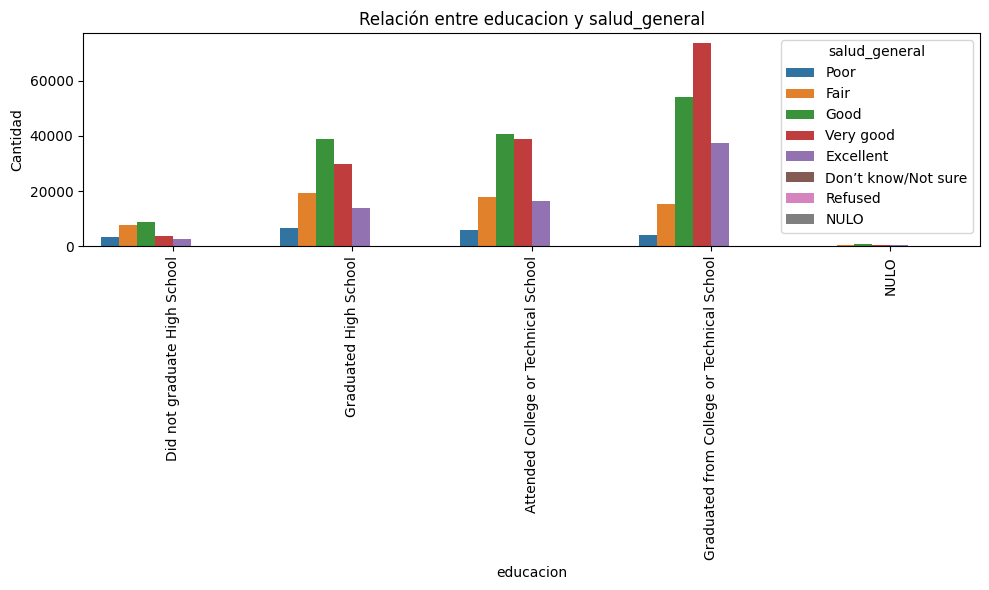

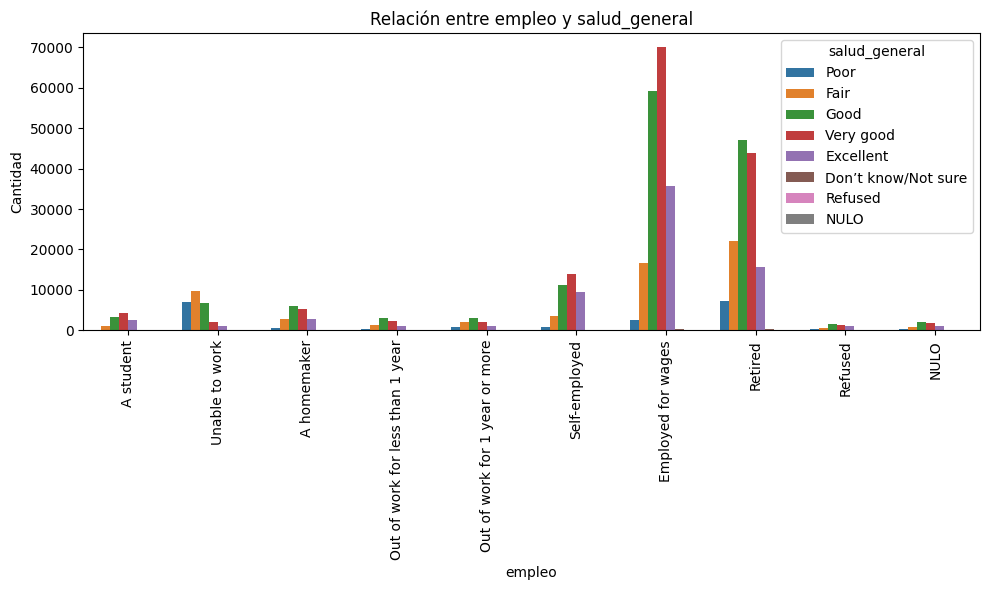

In [26]:
for col in datos:
    plot_cartegoricas(df, col, 'salud_general', orden_categorias)

Con este análisis concluimos que:

- La correlación más fuerte y visualmente perfecta de todo el estudio es la de **`ingresos` y `educación`**:
    - Pasar de ingresos bajos (<25k) a altos(>100k) transforma radicalmente la experiencia vital, eliminando casi por completo la percepción de "mala salud" y sustituyéndola por "excelencia".

- La salud generañ no cae en picado con la **`edad`**, sino que se transforma.
    - Perdemos la "Excelencia" de la juventud, pero la mayoría de la gente logra mantenerse en el estatus de "Buena salud" hasta bien entrada la vejez. La categoría "Good" es la más resiliente de todas.

- Respecto a la **situación laboral**:
    - **Estar empleado** es casi garantía de buena salud (o al menos, de ausencia de mala salud).
    - La categoría "`Unable to work`" es el mayor foco de mala salud de todo el estudio demográfico, superando incluso a los grupos de pobreza extrema.

#### ***5.1. Relación con el lugar de residencia***

- Todos estos aspectos de la salud, ¿tiene impacto real dependiendo de la zona dónde residas?

In [31]:
def boxplot_trivariante(df, col1, col2, hue, orden_dict)
    plt.figure(figsize=(14, 8))

    df_copy = df.copy()

    list_cols = [col1, col2, hue]

    for col in list_cols:
        if df_copy[col].dtype == 'O':
            if col in orden_dict:
                orden = orden_dict[col].copy()
            
            nulos = [cat for cat in df_copy[col] if "NULO" in cat]
            no_nulos = [cat for cat in orden if cat not in nulos]

            nulos_ = list(set(nulos))
            orden_final = no_nulos + nulos_ if nulos_ else orden

            df_copy[col] = pd.Categorical(df_copy[col], categories=orden_final, ordered=True)


    sns.boxplot(
        data=df,
        x=col1,
        y=col2,
        hue=hue
    )

    # 2. Mover la leyenda afuera de la gráfica
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', title='Diabetes', borderaxespad=0)

    # 3. Rotar etiquetas de abajo si se solapan
    plt.xticks(rotation=45)

    # 4. Título y etiquetas claras
    plt.title(f"Relación entre Fumar, Diabetes y Salud Física")
    plt.xlabel("Estado de fumador")
    plt.ylabel("Días con mala salud física")

    # 5. Ajuste final IMPORTANTE (con paréntesis)
    plt.tight_layout()

    plt.show()


SyntaxError: expected ':' (2391251047.py, line 1)